# 0. Review
## 0.A Scikit-Learn

Scikit-Learn is a machine learning python package. It allows users to access machine learning algorithms via **object-oriented programming**.

## 0.B Data Set

I will be using a dataset of antibiotic resistance in bacteria strains. 

- Each bacteria is labeled with its resistance to the antibiotic, azithromycin.
- Additionally, each bacteria sample is labelled if its genome contains certain strands of DNA.

We would like to learn antibiotic resistance from the bacterial genome. 

- Our predictors are whether strands of DNA are present.
- Our response are resistance classes.

First, we have to clean our data up. **This section will focus on data preprocessing.**


## 0.C Data Preprocessing

We did a bit of data preprocessing: 

- encoded the resistance feature as 0 - "resistant," 1 - "susceptible".
- encoded all features of the DNA strands as, 0 - "if its genome does not contain the strand of DNA", 1 - "if its genome contains the strand of DNA."
- standardized dataset of presence of DNA strands


## 0.C Data Reduction

We also reduce our dataset to two and three dimensions using PCA



## 0.D Load Data

Now, we reduced our dataset. Run the code below to load 

- the dataset, ```antibiotic_resistance_encoded_labels```, containing antibotic resistance phentype for each bacteria
- the dataset, ```transformed_DNA_2d```, containing DNA data reduced to 2d using PCA
- and the dataset, ```transformed_DNA_3d```, containing DNA data reduced to 3d using PCA


In [4]:
import pandas as pd
antibiotic_resistance_all_labels = pd.read_csv('datasets/antibiotic_resistance_encoded_labels',
                                               index_col=0)
transformed_DNA_2d = pd.read_csv('datasets/transformed_DNA_2d',index_col=0)
transformed_DNA_3d = pd.read_csv('datasets/transformed_DNA_3d',index_col=0)

**In this section, we will be covering unsupervised learning.**

Recall that **unsupervised learning** is extracting structure from data (self-organized learning - find previously unknown patterns in data set without pre-existing labels).

# 8. Clustering: KMeans

Clustering is a means of grouping data points together based on their proximity to each other.

A popular technique of clustering data is KMeans. KMeans assigns data points to a cluster based on a data points distance to the closest cluster center (centroid).

How does KMeans decide cluster centers?

## 8.A KMeans Algorithm


Consider the point cloud of data,

<img src="images/08_KMeans_00.png" alt="Drawing" style="width: 200px;"/>

1) *Randomly give each data point a number 1 through 3*. Each number represents a cluster assignment.

<img src="images/08_KMeans_01.png" alt="Drawing" style="width: 200px;"/>


2a) *For each cluster assignment, compute the centroid (the center of the cluster)*. The centroid is the mean of corresponding data points coordinates.


<img src="images/08_KMeans_02.png" alt="Drawing" style="width: 200px;"/>

3a) Update cluster assignment by *assigning each data point to the nearest centroid*

<img src="images/08_KMeans_03.png" alt="Drawing" style="width: 200px;"/>

4) Repeat step (2a)
<img src="images/08_KMeans_04.png" alt="Drawing" style="width: 200px;"/>

 and step (2b) until the cluster assignments do not change.

<img src="images/08_KMeans_05.png" alt="Drawing" style="width: 200px;"/>



## 8.B Clustering 2-D Projected Data

I'll show the results of KMeans on the 2-D projected data.

### I. Initialize ```KMeans``` object

In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)

### II. Fit KMeans object

In [18]:
kmeans.fit(transformed_DNA_2d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### III. Get cluster labels

In [19]:
cluster_labels = kmeans.labels_

###  IV. Plot clusters

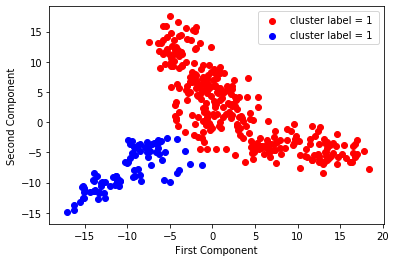

In [20]:
import matplotlib.pyplot as plt


#plot suspectible strains

cluster_label_assignment_0 = [label == 0 for label in cluster_labels]

plt.scatter(transformed_DNA_2d.iloc[cluster_label_assignment_0, 0],
            transformed_DNA_2d.iloc[cluster_label_assignment_0, 1],
            label='cluster label = 1',
            c='r')

#plot resistant strains

cluster_label_assignment_1 = [label == 1 for label in cluster_labels]

plt.scatter(transformed_DNA_2d.iloc[cluster_label_assignment_1, 0],
            transformed_DNA_2d.iloc[cluster_label_assignment_1, 1],
            label='cluster label = 1 ',
            c='b')

plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.legend()
plt.show()

### 8.B.2 Exercise: Retrieving the centroid coordinates


### 8.B.2 Exercise: Predicting Cluster Assignment



## 8.C Exercise: KMeans on 3-D Projected Data 


### 8.C.2 Exercise: Retrieving the centroid coordinates


### 8.C.2 Exercise: Predicting Cluster Assignment
